# Lecture 1 - Overview

## Overview

[![YouTube](https://upload.wikimedia.org/wikipedia/commons/thumb/4/42/YouTube_icon_%282013-2017%29.png/50px-YouTube_icon_%282013-2017%29.png)](https://youtu.be/9fQkLQZe3u8?si=zWsh5DmT8HeXj169)

## Review of Calculus

[![YouTube](https://upload.wikimedia.org/wikipedia/commons/thumb/4/42/YouTube_icon_%282013-2017%29.png/50px-YouTube_icon_%282013-2017%29.png)](https://youtu.be/-NhgElcA3K8?si=0fKrELVlyvSfci74)

In [1]:
using Plots

### Prerequisites


You may want to refresh your knowledge about limits, continuity, chain rule, etc ., [here](https://www.khanacademy.org/math/differential-calculus)

## The derivative

The *derivative* of a function $f(x)$: The rate of change of $f(x)$ with respect to an independent variable $x$

In [2]:
# define a function and its derivative
f(x) = x^2
df(x) = 2x
# generate values from it
out = []
for i in 1:20
    push!(out,f(i))
end

#derivative at x = 2
x0 = 2
y0 = f(x0)
slope = df(x0)
tangent_line(x) = slope * (x - x0) + y0
tangent_points = [tangent_line(i) for i in 1:4];

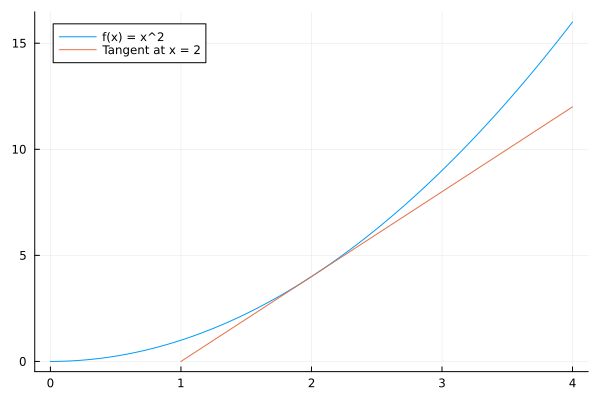

In [3]:
plot(out, label ="f(x)")
# Plot the function and the tangent line
plot(f, 0:0.01:4, label="f(x) = x^2")
plot!(tangent_points, label = "Tangent at x = 2")

The 'rise over run' definition using [limits](https://youtu.be/-ktrtzYVk_I?si=XwqVNGse2Ie8YtKl):

$$
\frac{df}{dx} = \lim_{\Delta x \to 0} \frac{f(x + \Delta x) - f(x)}{\Delta x}
$$


The chain rule tells you how a compositin function $f(g(x))$ changes with respect to $x$.

$$
\frac{d}{dx} \left( f(g(x)) \right) = \frac{df}{dx} \left( g(x) \right) \cdot \frac{dg}{dx}(x)
$$


We can do automatic differentiation in Julia.

In [4]:
using ForwardDiff

# compute the derivateive at x =2
f(x) = sin(x)
g(x) = x^3
fg(x) = f(g(x))
x = 2
df_dx = ForwardDiff.derivative(fg, x)
println(df_dx)

-1.7460004057033625


## Simple weather model 
[![YouTube](https://upload.wikimedia.org/wikipedia/commons/thumb/4/42/YouTube_icon_%282013-2017%29.png/50px-YouTube_icon_%282013-2017%29.png)](https://youtu.be/K-8F_zDMDUI?si=aMf38Gg0IV1hupO6)


Here we define a simple weather model where the transition from one day to the next is defined by the matrix $A$ and the starting weather is defined by vector $x$. Then, we simluate the pass of days (for 50 days), by 

$$
X_{tomorrow} = A\cdot x_{today}
$$

Note that the subscripts are not used below, $x$ is simply over written.

```{note}
1. *undef* In Julia, the `undef` keyword is used to create an uninitialized array or matrix. This can improve performance when you know the values will be immediately set.[[docs]](https://docs.julialang.org/en/v1/base/arrays/#Core.undef:~:text=Alias%20for%20UndefInitializer()%2C%20which%20constructs%20an%20instance%20of%20the%20singleton%20type%20UndefInitializer%2C%20used%20in%20array%20initialization%20to%20indicate%20the%20array%2Dconstructor%2Dcaller%20would%20like%20an%20uninitialized%20array.)
2. Arrays (referred to as "vectors" when they are one-dimensional) are fundamentally different from matrices and multi-dimensional arrays. [[docs]](https://docs.julialang.org/en/v1/manual/arrays/)
```

In [5]:
# transition probabilities defined as a matrix
A = [0.5 0.5 0.25; 0.25 0 0.25; 0.25 0.5 0.5]
# starting weather [raining, nice, cloudy]
x = [1;0;0]

# Define a matrix to store the weather 
weather = Matrix{Float64}(undef,50,3)
for day in 1:50
     x = A*x
     # index into the day (row) and place all the values of x there
     weather[day, :] = x[:]
end

In [6]:
size(weather)

(50, 3)

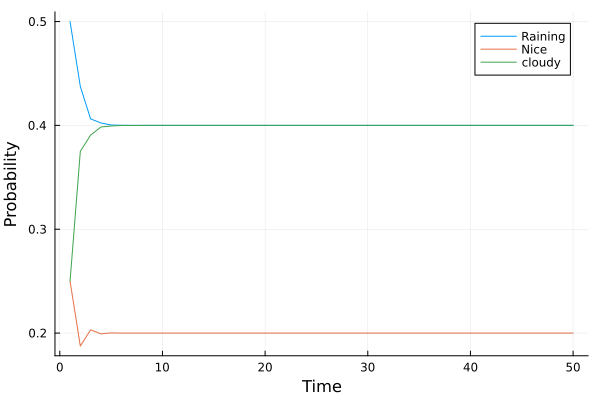

In [7]:
using Plots
plot(weather, xlabel ="Time", ylabel="Probability", label=["Raining" "Nice" "cloudy"])